In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train), len(X_test)

(60000, 10000)

(28, 28) Number is : 5


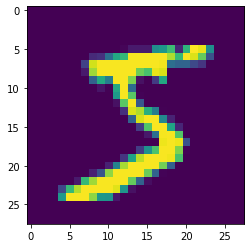

In [3]:
print(X_train[0].shape,"Number is :", y_train[0])
plt.imshow(X_train[0])
plt.show()

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_flt = X_train.reshape(len(X_train), 28*28)
X_test_flt = X_test.reshape(len(X_test), 28*28)
X_train_flt.shape, X_test_flt.shape

((60000, 784), (10000, 784))

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation= 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flt, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7184 - accuracy: 0.8151
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.9120
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2859 - accuracy: 0.9189
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2655 - accuracy: 0.9270


In [14]:
model.evaluate(X_test_flt, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9258


[0.2690596878528595, 0.9258000254631042]

In [19]:
prd = model.predict(X_test_flt)

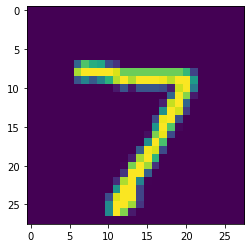

In [18]:
plt.imshow(X_test[0]);

In [21]:
prd[0]

array([4.27942351e-02, 5.42372163e-07, 6.60675913e-02, 9.53752816e-01,
       2.25286302e-03, 1.03191204e-01, 1.40374959e-06, 9.99816239e-01,
       1.17071271e-01, 6.56076312e-01], dtype=float32)

In [23]:
np.argmax(prd[0])

7

In [25]:
prd_lables = [np.argmax(i) for i in prd]
prd_lables[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 6]

In [27]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [29]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=prd_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    4,    4,    1,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [  11,   11,  924,   12,    6,    3,   12,   10,   38,    5],
       [   5,    0,   21,  913,    1,   25,    4,    9,   24,    8],
       [   3,    1,    5,    1,  910,    0,   10,    4,   10,   38],
       [  13,    3,    2,   27,    8,  776,   18,    6,   31,    8],
       [  14,    3,    5,    1,    7,   10,  914,    2,    2,    0],
       [   2,    7,   22,    8,    8,    0,    0,  948,    1,   32],
       [  13,   12,    6,   17,    9,   20,   10,   11,  870,    6],
       [  12,    7,    1,    7,   26,    6,    0,   24,    8,  918]])>

Text(69.0, 0.5, 'Truth')

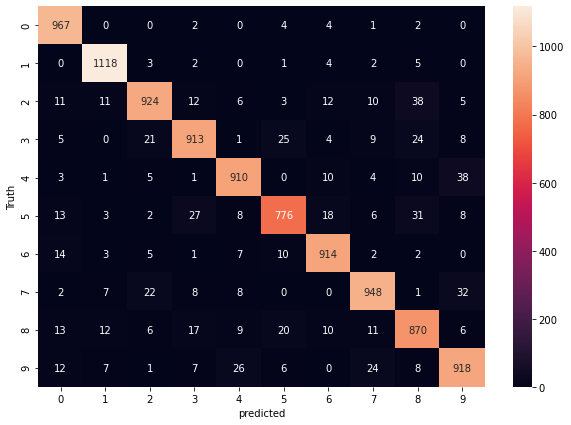

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation= 'relu'),
    keras.layers.Dense(10,activation= 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flt, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4552 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1297 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0502 - accuracy: 0.9842


Text(69.0, 0.5, 'Truth')

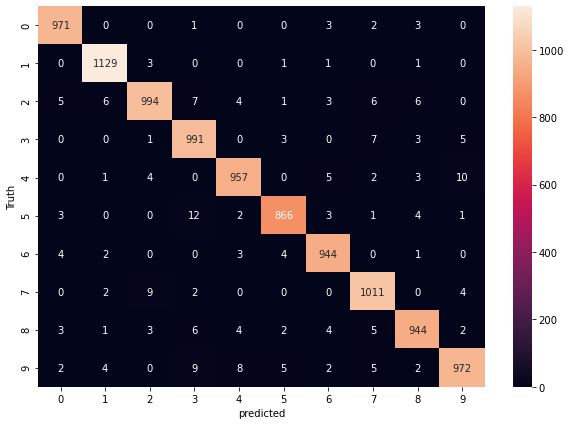

In [36]:
prd = model.predict(X_test_flt)
prd_lables = [np.argmax(i) for i in prd]
cm = tf.math.confusion_matrix(labels=y_test, predictions=prd_lables)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [59]:
er = ["categorical_crossentropy", "cosine_similarity", "mean_absolute_error", "mean_squared_error", "sparse_categorical_crossentropy"]
r = {}
for i in er:
    try:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(100,input_shape=(784,),activation= 'relu'),
            keras.layers.Dense(10,activation= 'sigmoid')
        ])
        model.compile(
            optimizer='adam',
            loss = i,
            metrics=['accuracy']
        )
        model.fit(X_train, y_train, epochs=5)
        r[i] = model.evaluate(X_test_flt, y_test)
    except Exception as e:
#         r[i] = e
        pass

Epoch 1/5
Epoch 1/5
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6468 - accuracy: 0.1155
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 3.5364 - accuracy: 0.1325
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5771 - accuracy: 0.0938
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 3.5665 - accuracy: 0.0895
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 3.5455 - accuracy: 0.0675
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.2850 - accuracy: 0.0905
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.2755 - accuracy: 0.1055
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.2236 - accuracy: 0.1035
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.1413 - accuracy: 0.1070
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - lo

Text(69.0, 0.5, 'Truth')

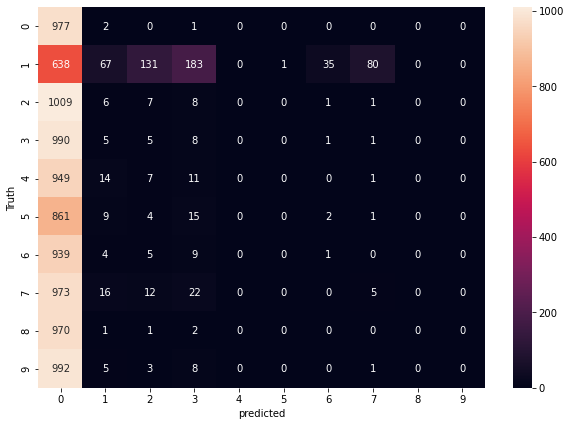

In [46]:
prd = model.predict(X_test_flt)
prd_lables = [np.argmax(i) for i in prd]
cm = tf.math.confusion_matrix(labels=y_test, predictions=prd_lables)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [62]:
r

{'mean_absolute_error': [3.54549503326416, 0.06750000268220901],
 'mean_squared_error': [20.24220085144043, 0.10130000114440918],
 'sparse_categorical_crossentropy': [0.07735822349786758, 0.975600004196167]}